# What Variables have a big impact (are important), and what variables have little (are not important)

### Importing the dataset and libraries


we have the data from: https://www.kaggle.com/datasets/dumanmesut/individual-carbon-footprint-calculation/data

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns

# Change display settings to show all columns
pd.set_option('display.max_columns', None)

df=pd.read_csv('Carbon_Emission.csv',sep=";")
df

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,obese,male,omnivore,twice a day,coal,private,hybrid,sometimes,230,never,268,medium,5,12,27,9,Yes,[],['Microwave'],2408
9996,normal,female,vegan,twice a day,coal,private,lpg,never,234,frequently,5316,extra large,3,14,8,24,Sometimes,"['Paper', 'Plastic']","['Stove', 'Microwave']",3084
9997,overweight,female,vegetarian,daily,electricity,walk/bicycle,NaN,sometimes,298,very frequently,96,extra large,5,11,5,24,Yes,"['Paper', 'Plastic', 'Metal']","['Microwave', 'Grill', 'Airfryer']",2377
9998,underweight,male,vegan,more frequently,coal,private,petrol,often,179,rarely,8688,medium,5,19,14,5,Sometimes,"['Paper', 'Metal']","['Stove', 'Microwave', 'Grill', 'Airfryer']",4574


### sorting the variable into groups 

In [98]:


#variables_quantitative =df.select_dtypes(include=[np.number]).drop('CarbonEmission',axis=1).columns.tolist()
variables_quantitative = [
    "Monthly Grocery Bill", "Vehicle Monthly Distance Km", 
    "Waste Bag Weekly Count", "How Long TV PC Daily Hour",
    "How Many New Clothes Monthly", "How Long Internet Daily Hour"]             #"CarbonEmission" wäre auch noch eine Zahlenmenge

variables_mit_mehreren_antwortmoeglichkeiten=["Recycling" ,"Cooking_With"]       #Variable mit mehrere Antwortmöglichkeiten

variables_for_one_hot_encoded=['Body Type','Sex','Diet','How Often Shower',
                               'Heating Energy Source','Social Activity',
                               'Frequency of Traveling by Air','Waste Bag Size','Energy efficiency']

variables_transport_vehicle_type=["Transport","Vehicle Type"]                    #Werte aus 2 Spalten in 1 Spalte zusammengeführt


### variables "Transport" and "Vehicle Type" (they have combined information)


In [99]:

##create new column: 
df["Transport Vehicle Type"]=df["Vehicle Type"] #definiere neue Spalte
df.loc[df["Transport Vehicle Type"].isna(), "Transport Vehicle Type"] = df["Transport"] # Werte aus 'Transport' übernehmen, wenn 'Vehicle Type' NaN ist


##add "Transport Vehicle Type" to one-hot-encoding-list
if "Transport Vehicle Type" not in variables_for_one_hot_encoded: ##wenn es noch nicht hinzugefügt wurde bzw is one element in the list already?
    variables_for_one_hot_encoded.append("Transport Vehicle Type") 

##veranschaulichen der neuen Spalten und ihrer Werte
df[["Transport","Vehicle Type","Transport Vehicle Type"]]


,Transport,Vehicle Type,Transport Vehicle Type
0,public,NaN,public
1,walk/bicycle,NaN,walk/bicycle
2,private,petrol,petrol
3,walk/bicycle,NaN,walk/bicycle
4,private,diesel,diesel
...,...,...,...
9995,private,hybrid,hybrid
9996,private,lpg,lpg
9997,walk/bicycle,NaN,walk/bicycle
9998,private,petrol,petrol


### variables "Recycling" and "Cooking_With" (these variables allow multiple answers)

In [100]:

##create new column: dummy-variables for Recycling
unique_values_Recycling= set([item for sublist in df['Recycling'].unique() for item in eval(sublist)]) # Liste aller einzigartigen Recycling-Möglichkeiten
# Für jede einzigartige Recycling-Möglichkeit eine neue Spalte hinzufügen und mit 0 oder 1 füllen
for item in unique_values_Recycling:
    df['Recycling '+str(item)] = df['Recycling'].apply(lambda x: 1 if item in x else 0)

##create new column: dummy-variables for Cooking-with
unique_values_cooking_With= set([item for sublist in df['Cooking_With'].unique() for item in eval(sublist)]) # Liste aller einzigartigen Cooking_With-Möglichkeiten
# Für jede einzigartige Cooking_With-Möglichkeit eine neue Spalte hinzufügen und mit 0 oder 1 füllen
for item in unique_values_cooking_With:
    df['Cooking With '+str(item)] = df['Cooking_With'].apply(lambda x: 1 if item in x else 0)



##add new columns to "variables_quantitative"-list for lineare Regression
columns_recycling=['Recycling '+str(item) for item in unique_values_Recycling] #liste mit Spalten-Namen
if columns_recycling[0] not in variables_quantitative: ##wenn es noch nicht hinzugefügt wurde bzw is one element in the list already?
    variables_quantitative += columns_recycling
columns_cooking_with=['Cooking With '+str(item) for item in unique_values_cooking_With] #liste mit Spalten-Namen
if columns_cooking_with[0] not in variables_quantitative: ##wenn es noch nicht hinzugefügt wurde bzw is one element in the list already?
    variables_quantitative += columns_cooking_with

#Person 282 cooks with "nothing" deshalb can bei one-hot-encoding nicht eine Spalte gelöscht werden, person 283 who doesn't recycle deshalb can bei one-hot-encoding nicht eine Spalte gelöscht werden
#Darstellung 
df.iloc[282:284, -13:] 

,Recycling,Cooking_With,CarbonEmission,Transport Vehicle Type,Recycling Paper,Recycling Metal,Recycling Glass,Recycling Plastic,Cooking With Oven,Cooking With Airfryer,Cooking With Stove,Cooking With Microwave,Cooking With Grill
282,"['Paper', 'Plastic', 'Metal']",[],1484,public,1,1,0,1,0,0,0,0,0
283,[],"['Stove', 'Grill', 'Airfryer']",2955,public,0,0,0,0,0,1,1,0,1


### Probleme bei Airfryer and Grill

### One-Hot-Encoding for categorical variables

In [101]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#X = df[variables_quantitative + variables_for_one_hot_encoded]   #Ziel: every column except "CarbonEmission"

# Create the ColumnTransformer using the list "variables_for_one_hot_encoded"
#cf = ColumnTransformer(
#    [(col, OneHotEncoder(drop="first"), [col]) for col in variables_for_one_hot_encoded],  
#    remainder="passthrough")   


#cf.fit(X)
#X_transformed = cf.transform(X)


In [102]:
#!!! this time without dropping the first column

#manual one-hot-encoding

for variable in variables_for_one_hot_encoded:
    column_name=variable

    ##create new column: 
    unique_values_clumn= list(df[column_name].unique())
    # Für jede einzigartige Cooking_With-Möglichkeit eine neue Spalte hinzufügen und mit 0 oder 1 füllen
    for item in unique_values_clumn:
        df[str(column_name) + ": " +str(item)] = df[column_name].apply(lambda x: 1 if item == x else 0)

    ##add column to variables_quantitative for lineare Regression
    list_dummy_columns=[str(column_name) + ": " +str(item) for item in unique_values_clumn] #liste mit Spalten-Namen
    if list_dummy_columns[0] not in variables_quantitative: #wenn es noch nicht hinzugefügt wurde bzw is one element in the list already?
        variables_quantitative += list_dummy_columns


X_transformed = df[variables_quantitative]

In [103]:

y = df["CarbonEmission"]


    ##Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_transformed,y, train_size = 0.75)


### linear Regression


In [104]:
    ##Implementing the linear model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

    ##Evaluating the Model
print("average R-squared score (from test-set):",model.score(X_test, y_test))


average R-squared score (from test-set): 0.9349831814795333


Gespräch mit chatGPT:

1. LGBMRegressor: Ja, dieser Algorithmus unterstützt feature_importances_.

2. HistGradientBoostingRegressor: Nein, dieser Algorithmus hat keine feature_importances_. Stattdessen kann permutation_importance aus sklearn verwendet werden, um die Feature-Wichtigkeit zu bestimmen.

3. XGBRegressor: Ja, dieser Algorithmus unterstützt feature_importances_.

4. GradientBoostingRegressor: Ja, dieser Algorithmus unterstützt feature_importances_.

5. MLPRegressor: Nein, dieser Algorithmus hat keine feature_importances_, da es sich um ein neuronales Netz handelt. Für neuronale Netze können andere Methoden wie permutation_importance oder SHAP (SHapley Additive exPlanations) verwendet werden, um die Wichtigkeit der Features zu bewerten.

Zusammenfassend lässt sich sagen, dass LGBMRegressor, XGBRegressor und GradientBoostingRegressor feature_importances_ unterstützen, während HistGradientBoostingRegressor und MLPRegressor dies nicht tun.

# LGBMRegressor

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000318 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 7500, number of used features: 54
[LightGBM] [Info] Start training from score 2273.826400


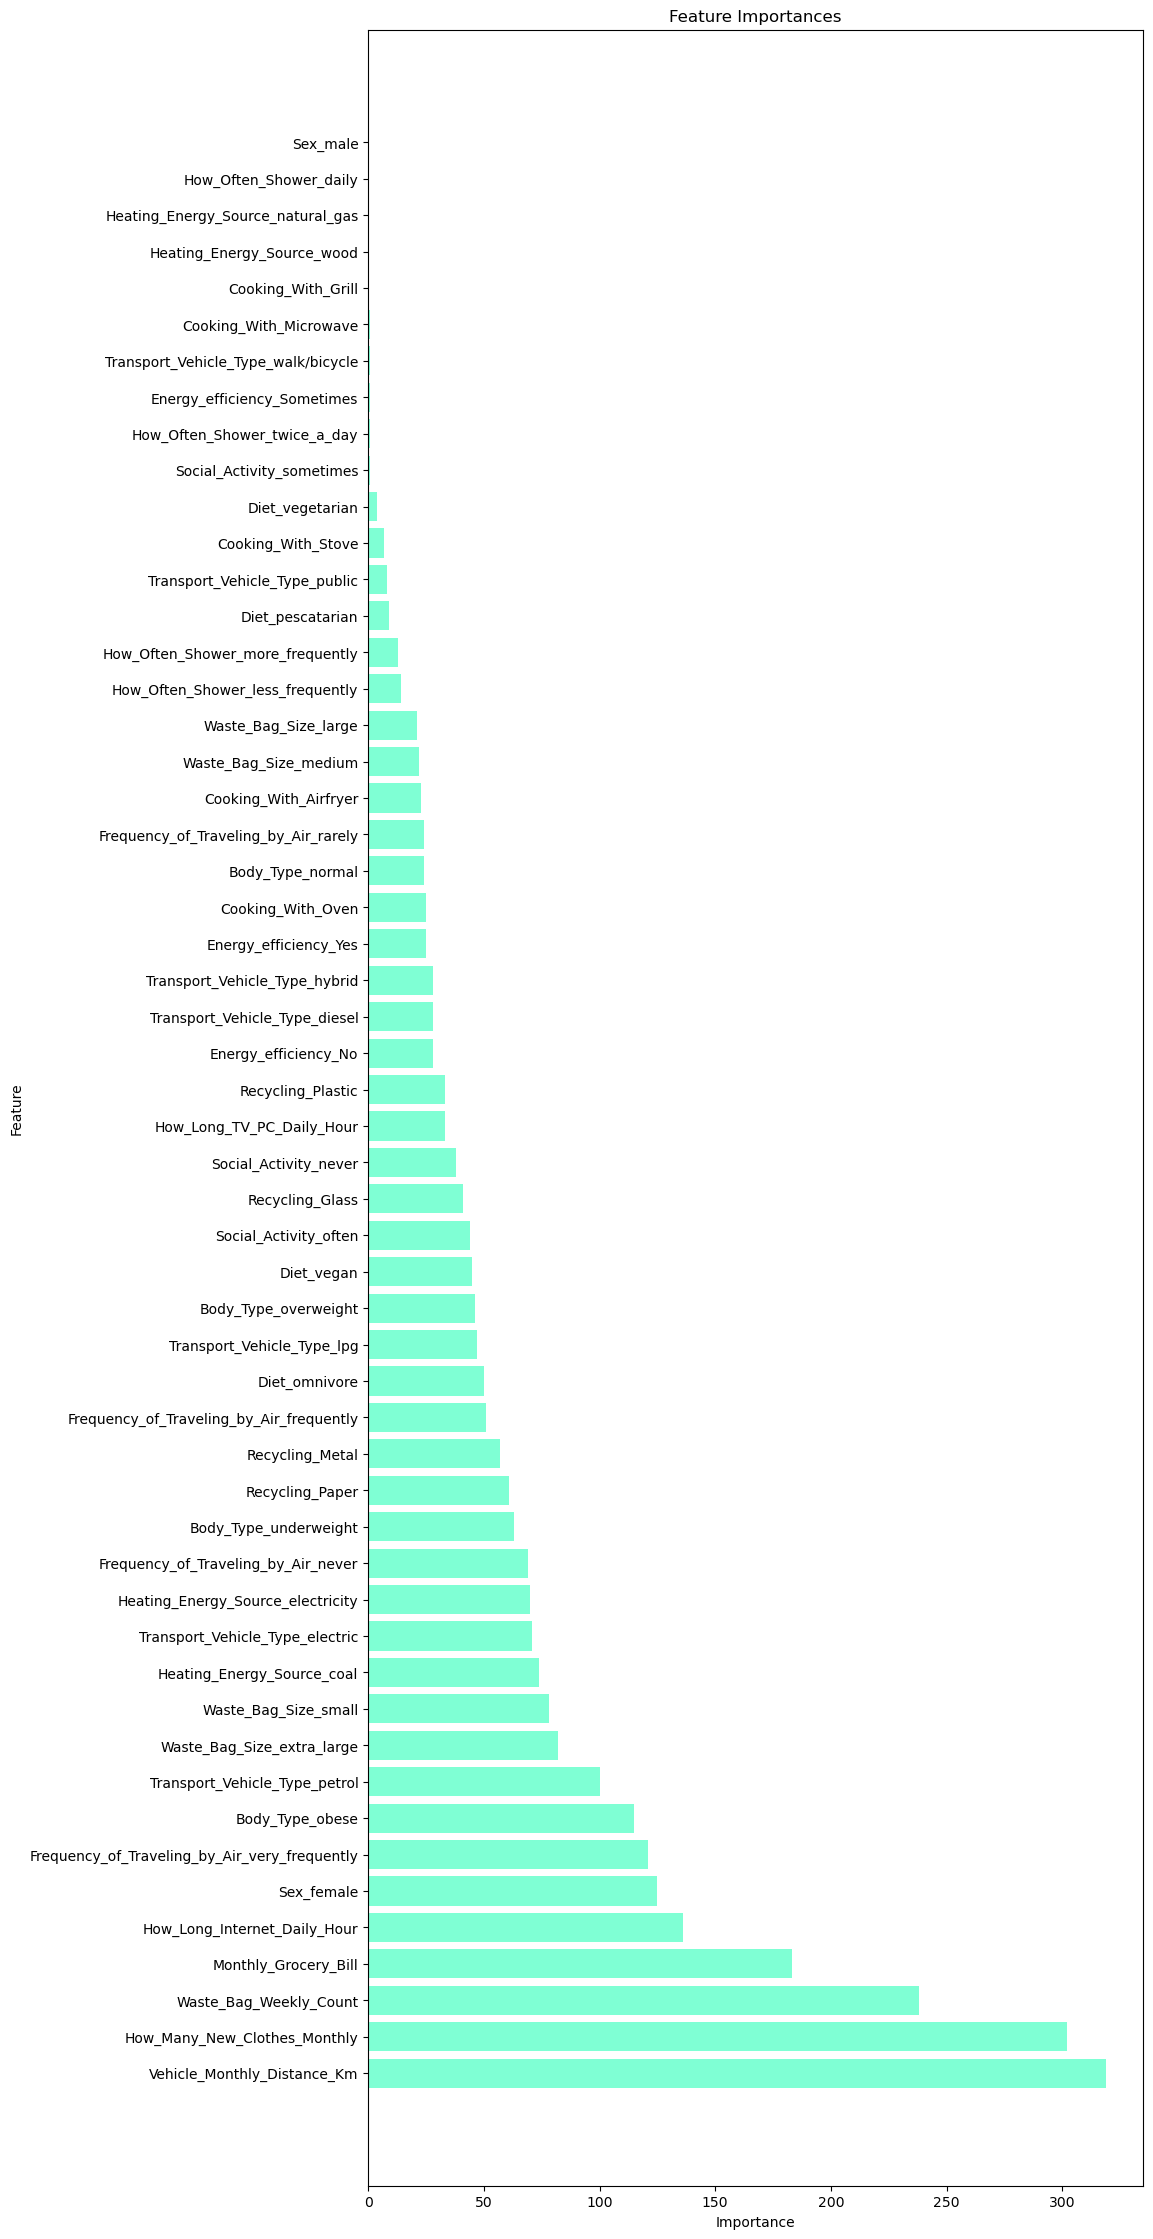

In [105]:
#LGBMRegressor


# Funktion Ersetze Leerzeichen und Doppelpunkte in den Spaltennamen durch Unterstriche
def clean_column_names(feature_names):
    cleaned_names = []
    for name in feature_names:
        cleaned_name = name.replace(' ', '_').replace(':', '')
        cleaned_names.append(cleaned_name)
    return cleaned_names

#df.columns = clean_column_names(df.columns) #so Spalten umbenennen

####################################

# Ersetze Leerzeichen und Doppelpunkte in den Spaltennamen durch Unterstriche
X_train.columns = clean_column_names(X_train.columns)
all_feature_names = clean_column_names(variables_quantitative)


from lightgbm import LGBMRegressor
model = LGBMRegressor()
model.fit(X_train, y_train)

####################################

feature_importances = model.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 28))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='Aquamarine')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

# HistGradientBoostingRegressor

In [106]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.inspection import permutation_importance

model = HistGradientBoostingRegressor()
model.fit(X_train, y_train)

################

# Permutation Importance abrufen
result = permutation_importance(model, X, y, n_repeats=10, random_state=0)
feature_importances = result.importances_mean
print("HistGradientBoostingRegressor Feature Importances:", feature_importances)


all_feature_names = variables_quantitative

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 28))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='Aquamarine')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

NameError: name 'X' is not defined

# RandomForestRegressor

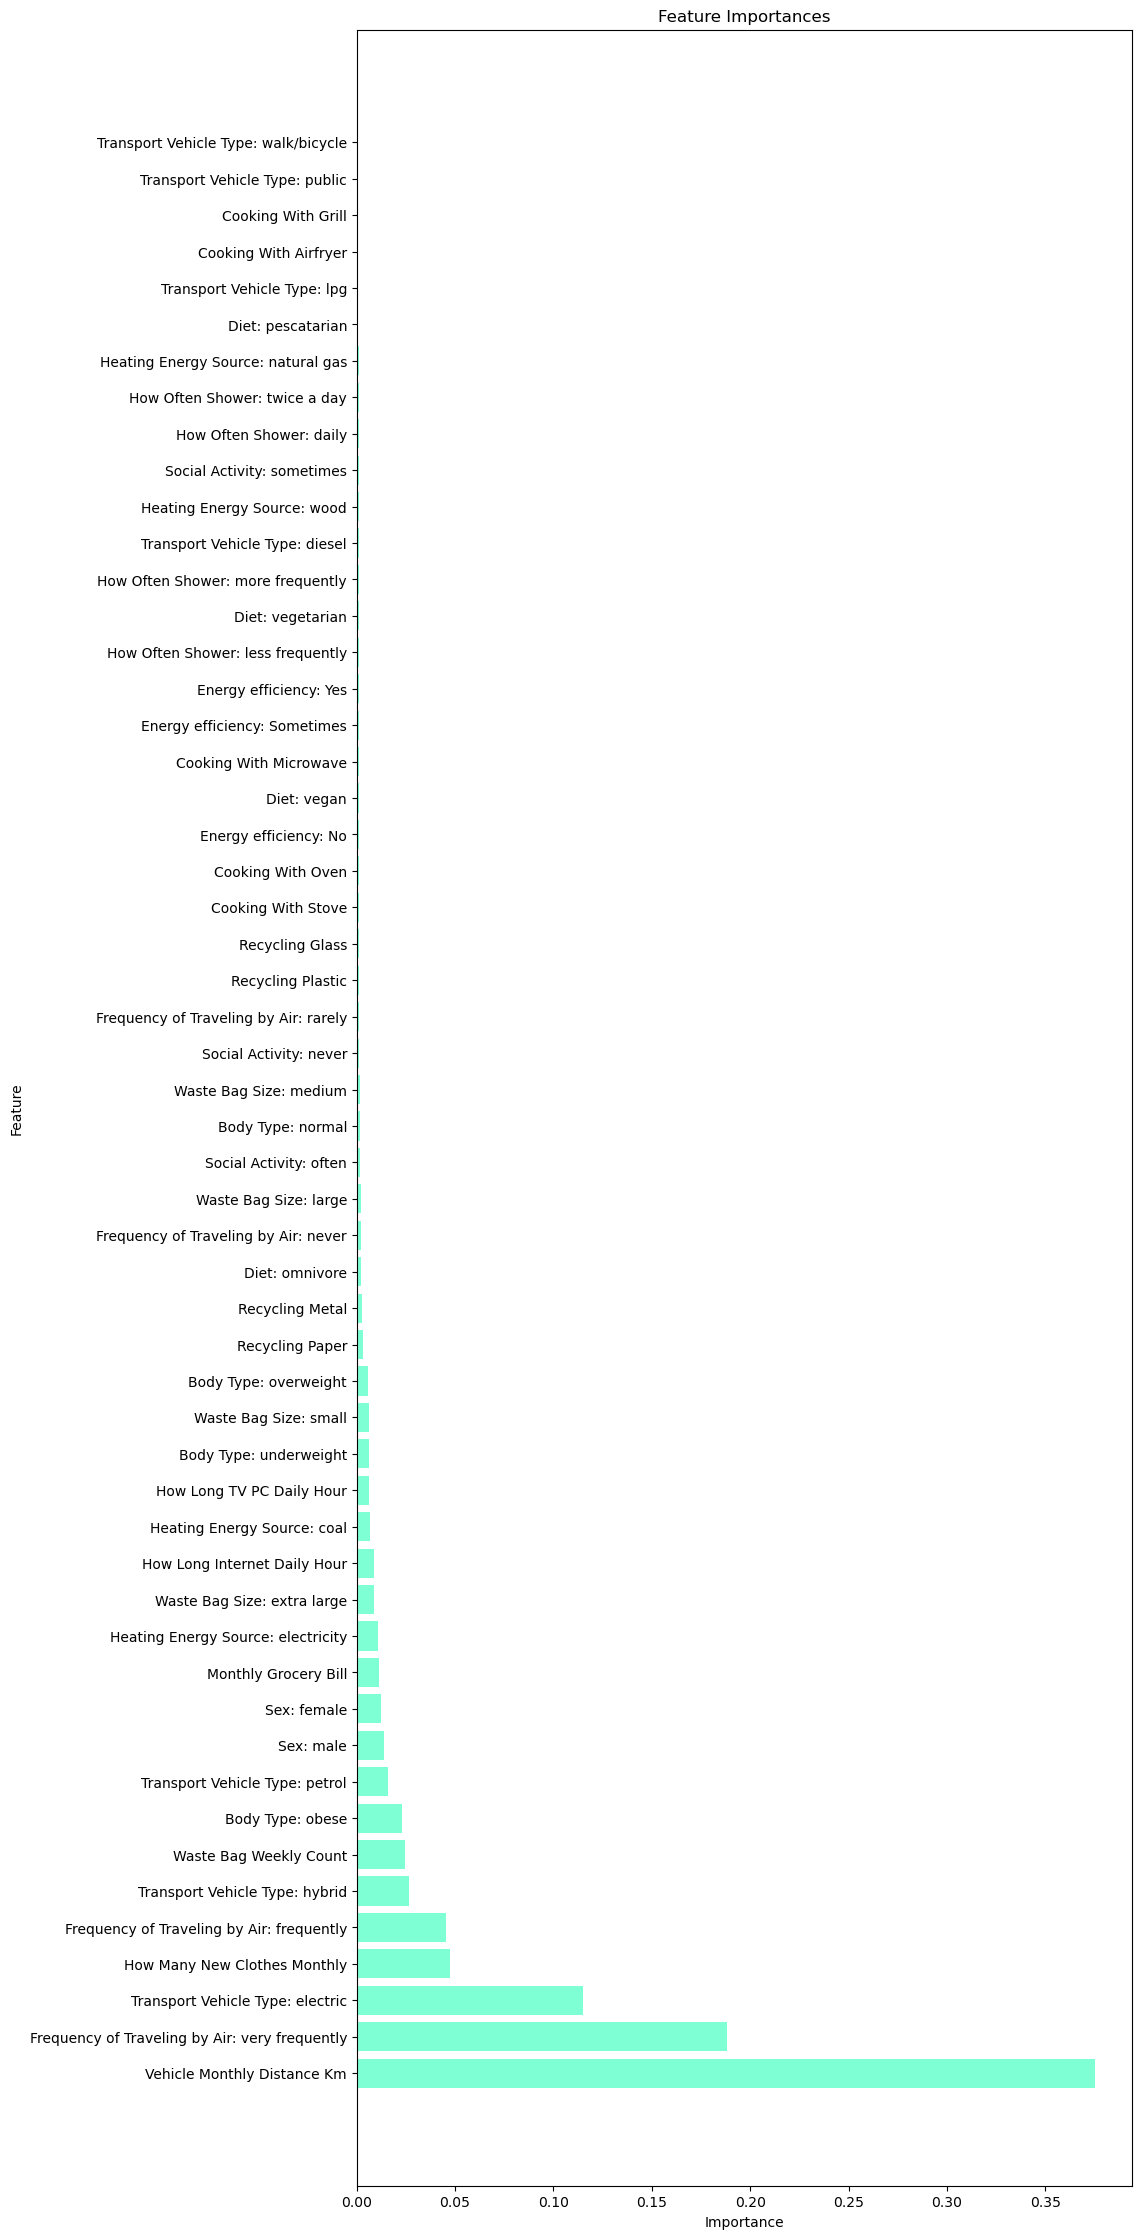

In [107]:
#RandomForestRegressor aus sklearn.ensemble:
#Ein Ensemble von Entscheidungsbäumen, das für Regression verwendet wird. Die Feature-Wichtigkeit wird durch die Mittelung der Wichtigkeiten der einzelnen Bäume berechnet.

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)


################


feature_importances = model.feature_importances_

all_feature_names = variables_quantitative

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 28))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='Aquamarine')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

# GradientBoostingRegressor

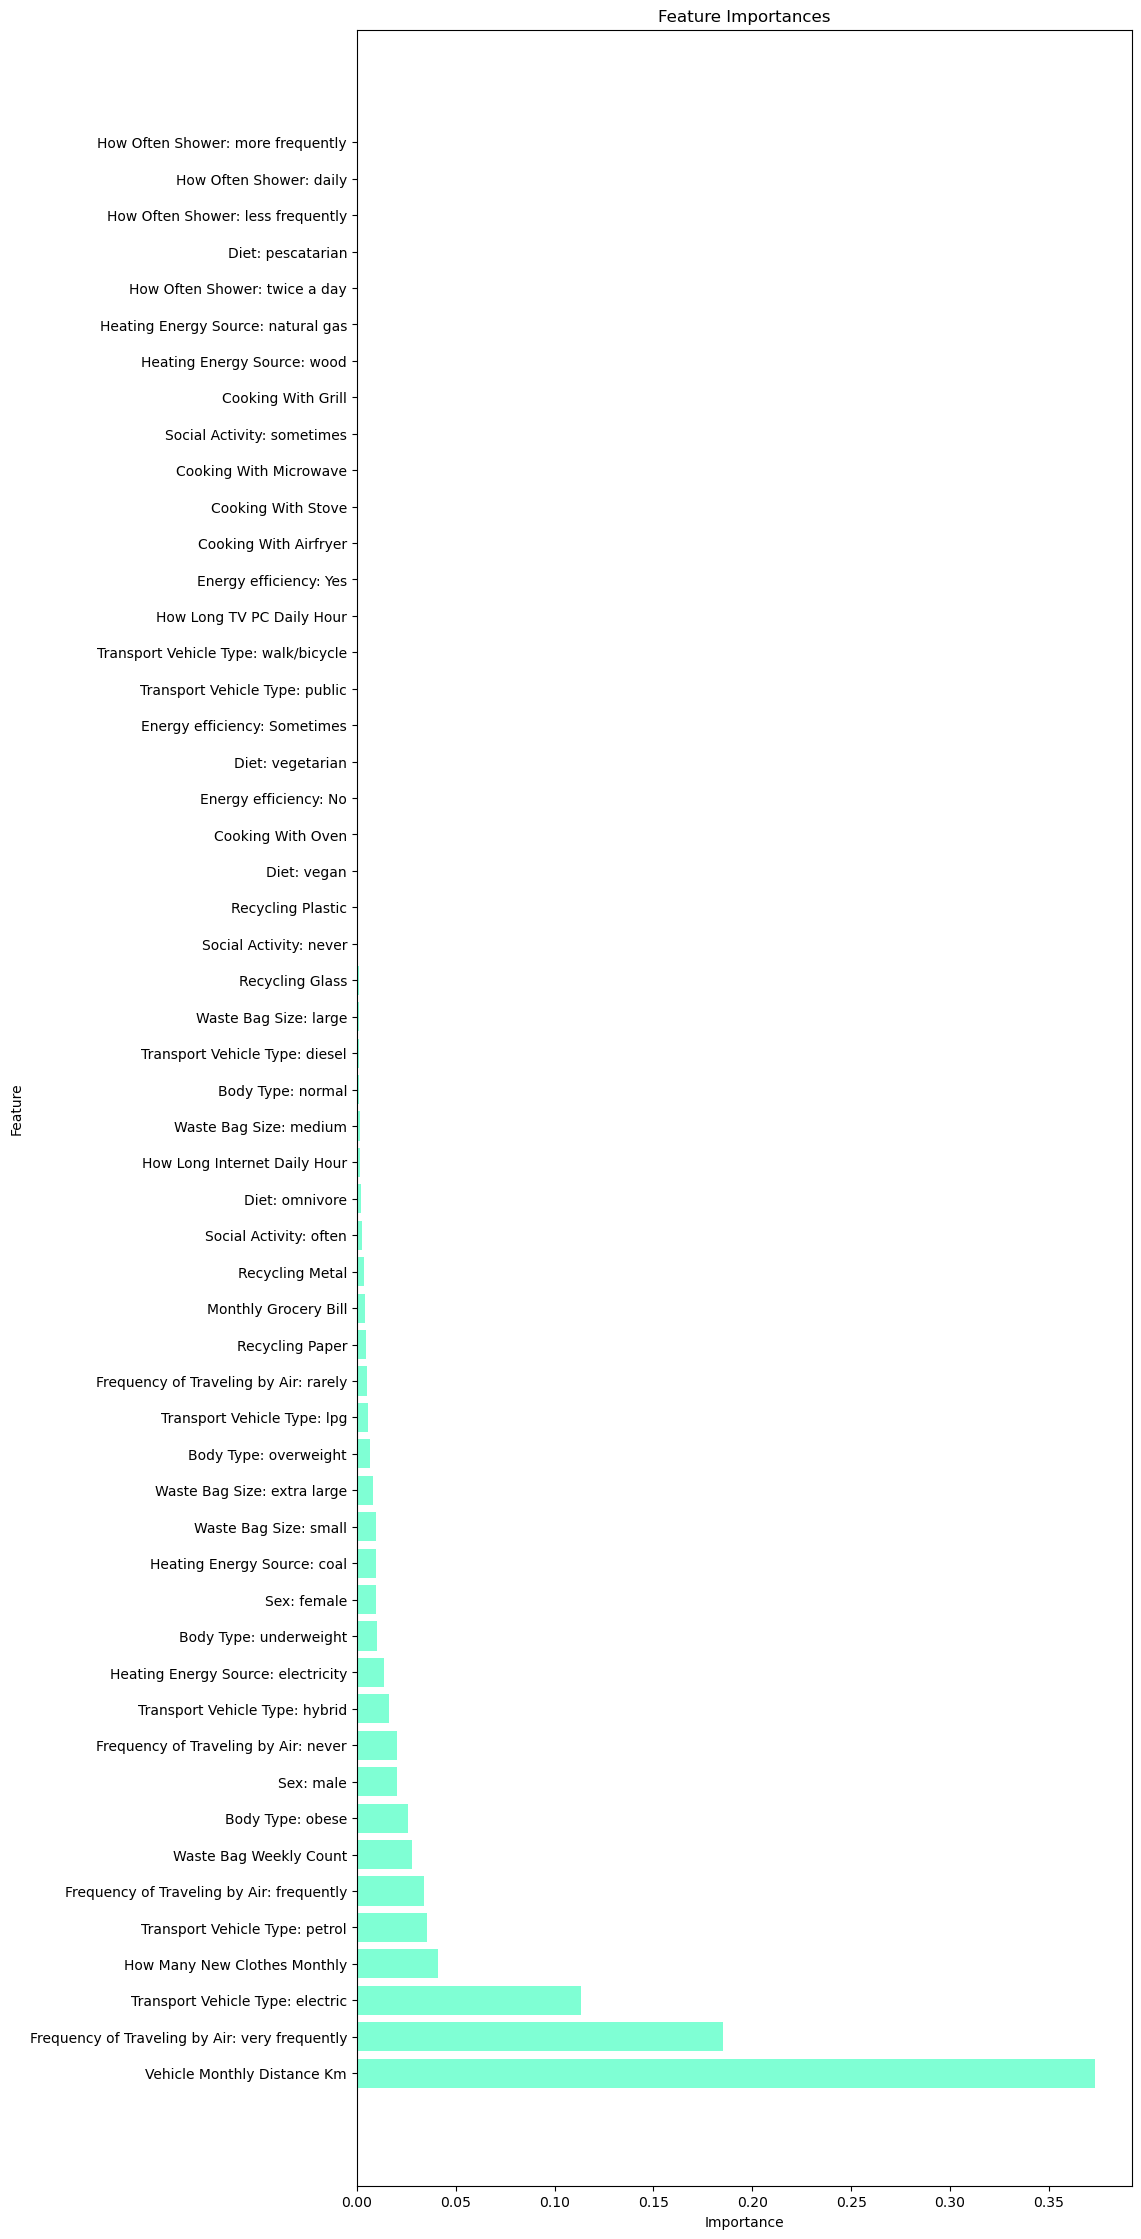

In [108]:
#GradientBoostingRegressor aus sklearn.ensemble:
#Ein Ensemble-Modell, das Gradient Boosting auf Entscheidungsbäumen verwendet.

from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

################


feature_importances = model.feature_importances_

all_feature_names = variables_quantitative

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 28))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='Aquamarine')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

# ExtraTreesRegressor

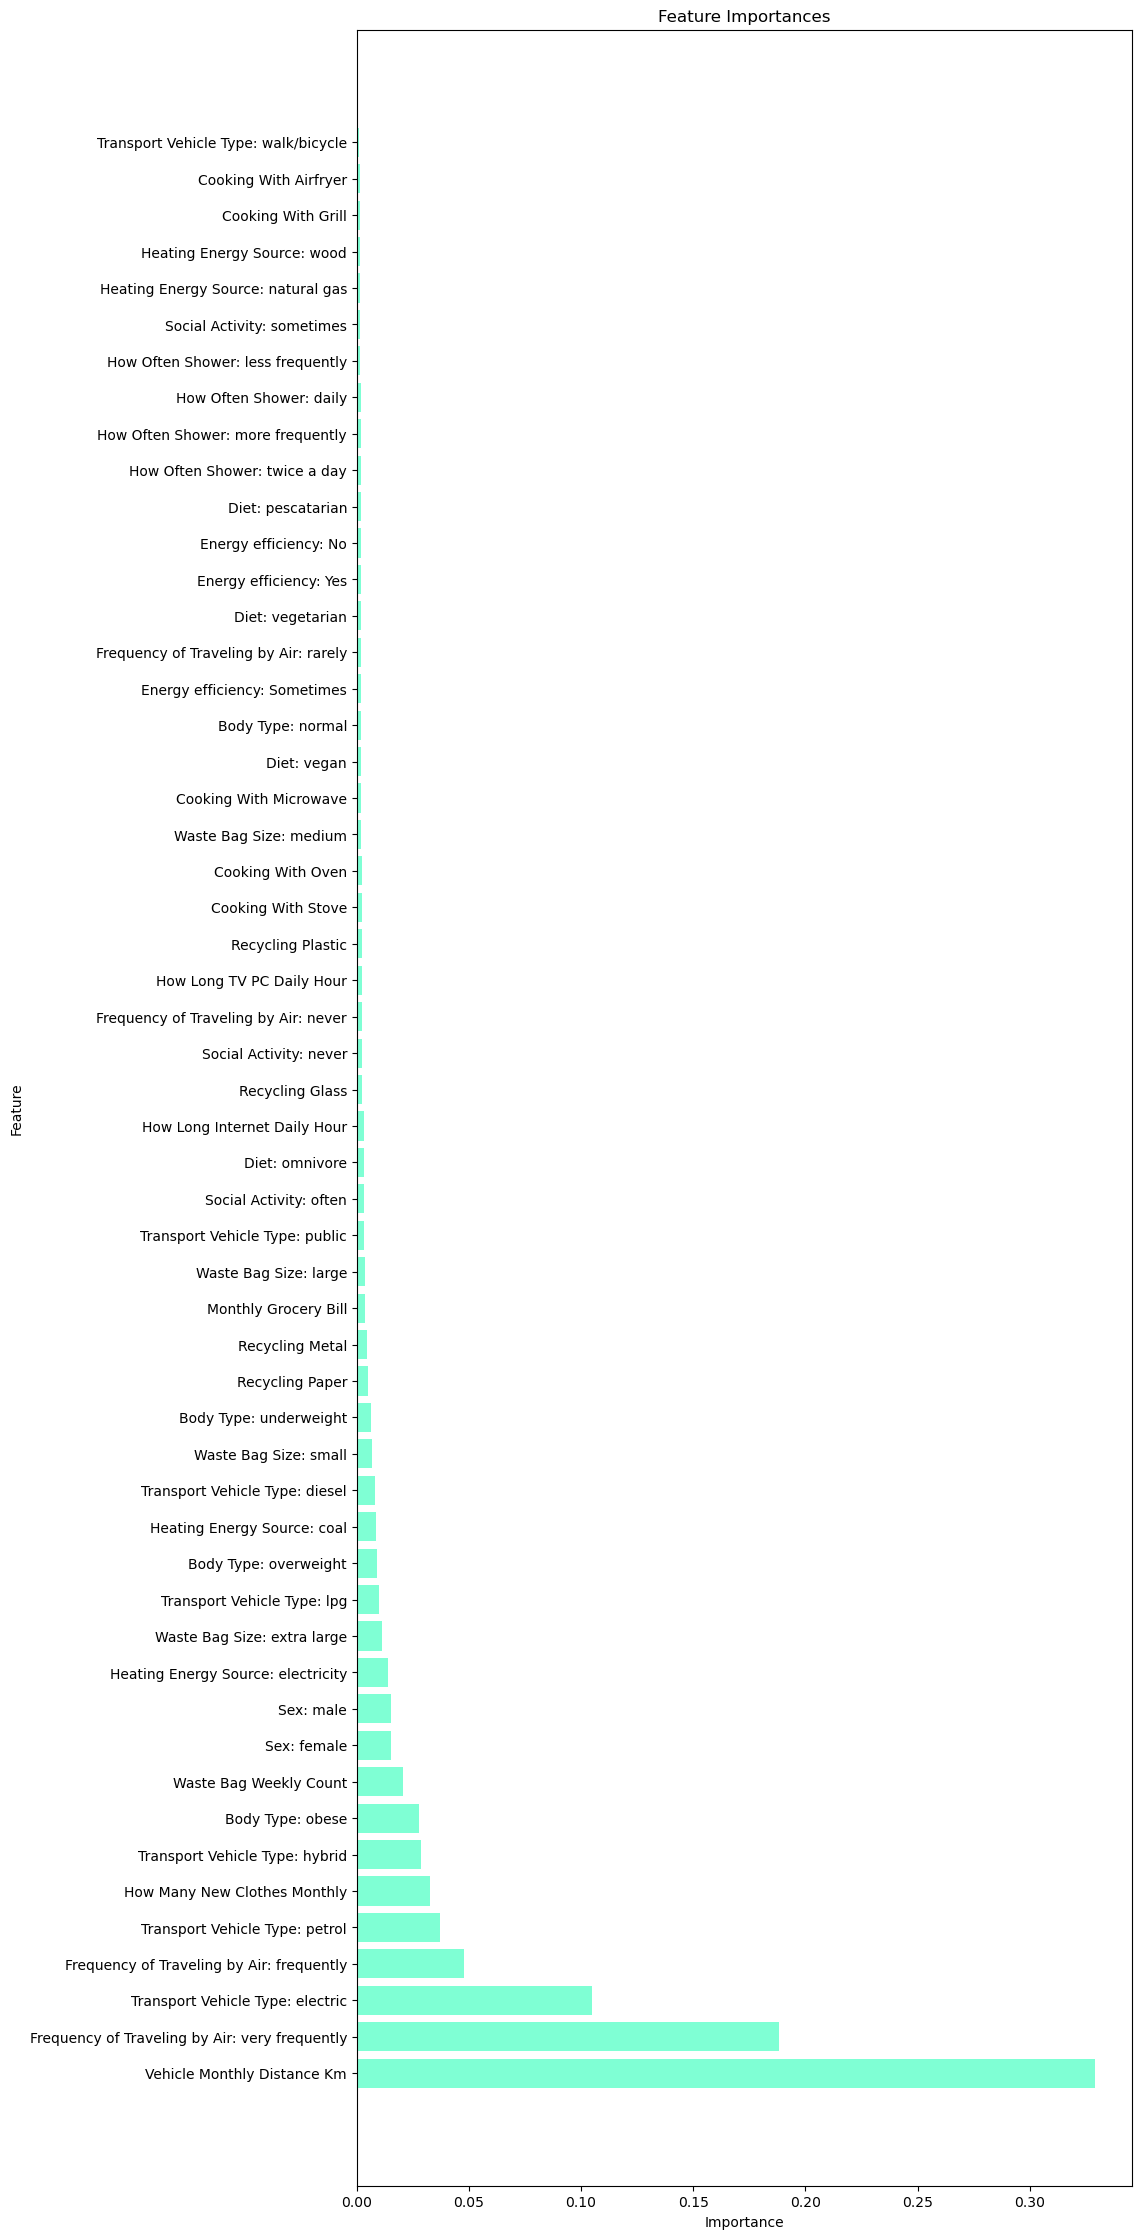

In [109]:
#ExtraTreesRegressor aus sklearn.ensemble:
#Ein Ensemble von Entscheidungsbäumen ähnlich wie RandomForest, aber mit mehr zufälliger Entscheidungsfindung beim Splitten.

from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X_train, y_train)

################


feature_importances = model.feature_importances_

all_feature_names = variables_quantitative

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 28))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='Aquamarine')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

# correlation-metric

In [110]:
#Hinweis: Pandas Version 2.0
#Falls du Pandas Version 2.0 oder neuer verwendest, könnte ein Fehler auftreten:
#"could not convert string to float". Dies liegt daran, dass seit Version 2.0 der Parameter `numeric_only=True` zu der Methode `df.corr` hinzugefügt werden muss. Die korrigierte Zeile sieht dann so aus:
#df.corr(numeric_only=True)["CarbonEmission"].abs().sort_values(ascending=False)


correlations = df.drop(variables_for_one_hot_encoded + ['Transport','Vehicle Type','Recycling','Cooking_With'],axis=1)

correlations.corr()["CarbonEmission"].abs().sort_values(ascending=False)


CarbonEmission                                    1.000000
Vehicle Monthly Distance Km                       0.594171
Frequency of Traveling by Air: very frequently    0.434243
Transport Vehicle Type: petrol                    0.382708
Frequency of Traveling by Air: never              0.310208
Transport Vehicle Type: lpg                       0.291281
Transport Vehicle Type: walk/bicycle              0.276308
Transport Vehicle Type: diesel                    0.243221
Transport Vehicle Type: public                    0.208929
How Many New Clothes Monthly                      0.198887
Frequency of Traveling by Air: rarely             0.182285
Body Type: obese                                  0.165703
Sex: male                                         0.163895
Sex: female                                       0.163895
Waste Bag Weekly Count                            0.159193
Body Type: underweight                            0.143420
Heating Energy Source: electricity                0.1321